O intuito desse projeto é utilizar um modelo de aprendizado de maquina que consiga predizer qual o tipo de usuário que realiza o teste gratis do projeto proposto pela materia de Web. 

Criamos um formulario no Microsoft forms com algumas 5 perguntas, sendo que a ultima pergunta era se o uruario tem interesse ou não em se inscrever no teste gratis. 

Obtemos cerca de 40 respostas no formulário, após isso, convertemos as respostas para um arquivo CSV, arquivo esse que vamos utilizar para a criação do dataset e para o aprendizado de maquina.

Os Markdowns tem como função mostrar o passo a passo da solução, você pode obter mais informações do projeto no arquivo README.md


Importação das bibliotecas necessarias para a sprint

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



atribuição do arquivo csv na variavel df.

In [3]:
df = pd.read_csv('FormTesteGratis.csv')
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 6 columns):
 #   Column                                                                                                                                                                                  Non-Null Count  Dtype
---  ------                                                                                                                                                                                  --------------  -----
 0   ID                                                                                                                                                                                      47 non-null     int64
 1   De 0 a 5, o quanto voce sabe sobre o que e CRM?                                                                                                                                         47 non-null     int64
 2   de 0 a 5, o quanto voce conhece sobre Salesforce 

,ID,"De 0 a 5, o quanto voce sabe sobre o que e CRM?","de 0 a 5, o quanto voce conhece sobre Salesforce (Considere 0 como nao conheco e 5 como conheco muito)","Qual o tamanho da sua empresa? (Considere 1 como pequena empresa de 0 a 9 funcionarios, 2 como media empresa de 10 a 50 funcionarios e 3 como grande empresa, acima de 50 funcionarios",O Quao importante voce considera o uso de CRM para a sua empresa?,Voce consideraria realizar o teste gratis da Salesforce?
0,1,0,0,1,5,1
1,2,0,0,1,0,1
2,3,3,4,1,5,1
3,4,0,0,1,0,1
4,5,3,2,2,4,1


Tratamento da variavel df, remoção de dados que não são uteis


In [ ]:
df = df.dropna()
df = df.drop_duplicates()
df.info()

Grafico de pares para identificar relações visuais entre os dados.

<Axes: >

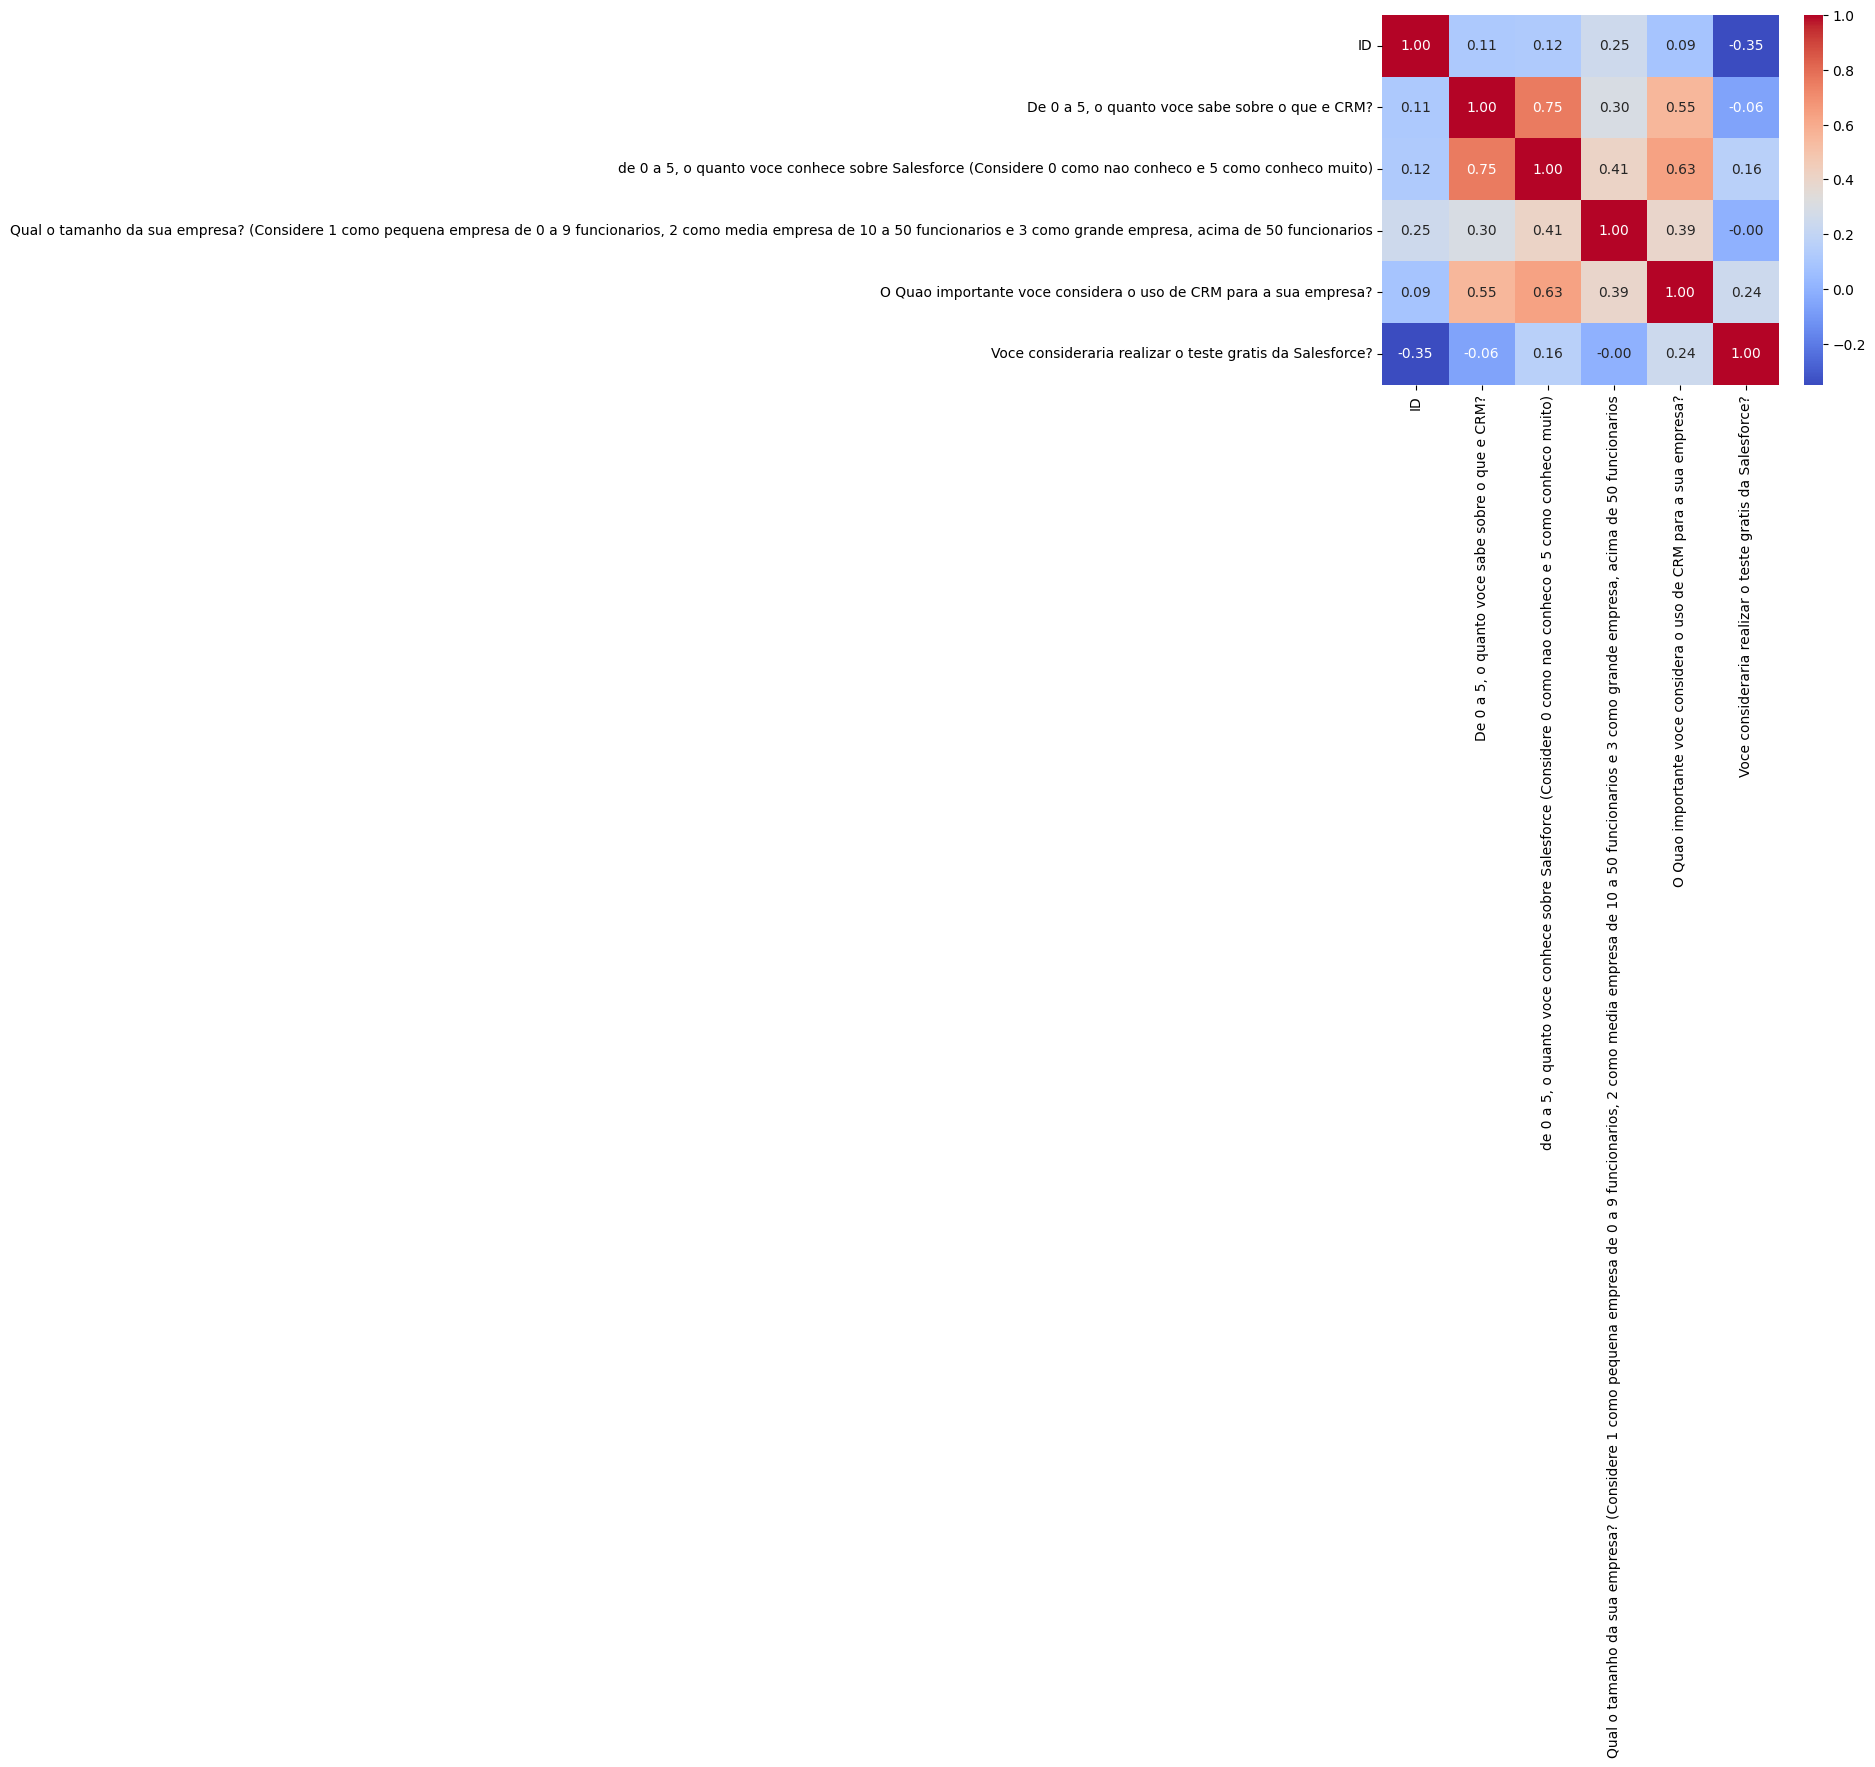

In [7]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')